In [2]:
"""
Tests for the postprocess module to verify simulation data is processed correctly.
"""

import os
import sys  # noqa
sys.path.append('./')  # noqa

import pytest
import numpy as np
# from src import postprocess as pp
import fdsreader as fds

# sample simulation data
# sim = fds.Simulation(
#     r"./tests/testing_data/Case_C064_fine_out_cat.smv")

sim = fds.Simulation(
    r"./testing_data/test_data/out_crop_circles_cat.smv")


In [14]:
len(sim.slices)

6

In [15]:
len(sim.meshes)

3

In [21]:
sim.slices[1]

Slice([2D] quantity=Quantity('HRRPUV'), cell_centered=True, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [0.20, 0.20]), extent_dirs=('x', 'y'), orientation=3)

In [29]:
data = []
coords = []
times = []

for slice in sim.slices:

    # Creates a global numpy ndarray from all subslices (of the slice)
    # xyz is the returned matching coordinate for each value on the generated grid (data).
    # can return large sparse arrays for some slices
    slice_data, slice_coords = slice.to_global(
        return_coordinates=True, masked=True)
    # times for each slice
    slice_times = slice.times

    data.append(slice_data)
    coords.append(slice_coords)
    times.append(slice_times)

In [41]:
np.array(times).shape

(6, 337)

In [43]:
np.array(coords) # coordinates for each slice

array([{'x': array([-6. , -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5. ,
              -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4. , -3.9,
              -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. , -2.9, -2.8,
              -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9, -1.8, -1.7,
              -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6,
              -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,
               0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,
               1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,
               2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,
               3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,
               5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ]), 'y': array([-18. , -17.9, -17.8, -17.7, -17.6, -17.5, -17.4, -17.3, -17.2,
              -17.1, -17. , -16.9, -1

In [31]:
len(data) # one for each slice

6

In [39]:
np.array(data[0]).shape # data for first slice

# times, x, y coordinates for first slice

(337, 121, 301)

In [36]:
data[0]

array([[[1.25112796, 1.25230682, 1.25206959, ..., 1.24726868,
         1.24745727, 1.24745727],
        [1.24966538, 1.24987435, 1.24923408, ..., 1.24842095,
         1.24851358, 1.24851358],
        [1.24858403, 1.24835134, 1.24809957, ..., 1.24799502,
         1.24674237, 1.24674237],
        ...,
        [1.24888468, 1.24847758, 1.24776912, ..., 1.24980235,
         1.25034642, 1.25034642],
        [1.24823368, 1.24799371, 1.24827874, ..., 1.24920726,
         1.24943888, 1.24943888],
        [1.24823368, 1.24799371, 1.24827874, ..., 1.24920726,
         1.24943888, 1.24943888]],

       [[1.26843417, 1.26966441, 1.27194059, ..., 1.24409485,
         1.24403512, 1.24403512],
        [1.26857567, 1.26901805, 1.26917171, ..., 1.24430287,
         1.24505246, 1.24505246],
        [1.26848459, 1.26816869, 1.26707792, ..., 1.24625063,
         1.2450732 , 1.2450732 ],
        ...,
        [1.26889241, 1.26888859, 1.26737261, ..., 1.24369121,
         1.24571013, 1.24571013],
        [1.2

In [37]:
sim.times

0.0
90.0


[0.0, 90.0]

In [18]:
bndf_data = []
for mesh in sim.meshes:
    bndf_data.append(mesh.get_boundary_data(
        quantity="WALL TEMPERATURE"))
sim.meshes[0].get_boundary_data(quantity="WALL TEMPERATURE")

bndf_data = np.vstack(bndf_data)
bndf_data

array([[Boundary(Quantity=Quantity('WALL TEMPERATURE'), Patches=1)],
       [Boundary(Quantity=Quantity('WALL TEMPERATURE'), Patches=1)],
       [Boundary(Quantity=Quantity('WALL TEMPERATURE'), Patches=1)]],
      dtype=object)

In [19]:
bndf_data = []
for mesh in sim.meshes:
    bndf_data.append(mesh.get_boundary_data(
        quantity="TEMPERATURE"))
sim.meshes[0].get_boundary_data(quantity="TEMPERATURE")

bndf_data = np.vstack(bndf_data)

StopIteration: 

<hr>

getting coordinates

In [9]:
import numpy as np

data = np.array(([0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
                [1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
                [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]))

row_coords = np.zeros(data.shape[0])

x_coords = []
y_coords = []

data.shape[0] # rows
data.shape[1] # columns


# grab the top-most array (x, y) locations where the data = 1
for column in range(data.shape[1]):  # for each column
    for row in range(data.shape[0]):  # for each row
        if data[row, column] == 1:
            x_coords.append(column)
            y_coords.append(row)
            break

print(x_coords)
print(y_coords)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 1, 1, 2, 2, 2, 1, 1, 1, 2]


In [11]:
data

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]])

In [10]:
# convert the above to cartesian coordinates

# convert array (x, y) coordinates into cartesian coordinates
# x = u * (dx) + tx
# y = v * (dy) + ty

[-9 -8 -7 -6 -5 -4 -3 -2 -1  0]
[-1 -1 -1  0  0  0 -1 -1 -1  0]


## FIXME above

<hr>

stitching mesh data

In [9]:
def stitch_mesh_data_to_array(list_of_meshes):
    """
    Takes data from an individual mesh and stitches it to a larger array.

    Step 1) Determine the size of the larger array.
    Step 2) Initialize the larger array.
    Step 3) Iterate over each mesh
        a) Determine the offset of the mesh in the larger array.
        b) Add the mesh to the larger array.

    Parameters
    ----------
    list_of_meshes : list[mesh]
        A list of mesh objects.

    Returns
    -------
    stitched_data : array-like object
        A 3D array-like object of data of a quantity. Dimensions of the array are (time, y, x).
    """
    # FIXME: The meshes or slice arrays may not be the same shape. How do we handle this? vstack will not work in this case.
    # determine the size of the stitched array

    # treat as 2D array and iterate over time
    # for each timestep, stitch the meshes together
    # iterate over each timestep and stitch these meshes together

    for timestep in list_of_meshes[0, :, :]:
        continue
    return np.vstack(list_of_meshes)



def get_bndf_data(sim, qty):
    """
    This function will take in a simulation file and return a 3D array-like object of
    the data for the given quantity. Dimensions of the array are (time, y, x).

    The data comes from the fdsreader bndf object.

    NOTE: It may be necessary to stitch together multiple meshes to get the full data.

    Parameters
    ----------
    sim : fdsreader.Simulation
        A simulation object.
    qty : string
        The name of the quantity to get data for.

    Returns
    -------
    data : array-like object
        A 3D array-like object of data of a quantity. Dimensions of the array are (time, y, x).
    """
    # get global boundary data arrays for each individual mesh
    data = []

    for mesh in sim.meshes:
        data.append(
            mesh.get_boundary_data(quantity=qty))

    # stitch the data together
    data = stitch_mesh_data_to_array(data)

    return data

In [71]:
# Mesh object to Boundary object

aa = []
for mesh in sim.meshes:
    aa.append(mesh.get_boundary_data(quantity="WALL TEMPERATURE"))

print(aa) # returns a list of Boundary objects

print(aa[0].data) # returns a dict object of a Patch object

print(aa[0].n_t()) # number of timesteps in the boundary

print(aa[0].orientations)

print(aa[0].data[3]) # Patch object

# print(aa[0].data[3].data) # data for the patch

patch_data = aa[0].data[3].data

patch_data.shape


[Boundary(Quantity=Quantity('WALL TEMPERATURE'), Patches=1), Boundary(Quantity=Quantity('WALL TEMPERATURE'), Patches=1), Boundary(Quantity=Quantity('WALL TEMPERATURE'), Patches=1)]
{3: Patch(shape=(41, 301), orientation=3, extent=Extent([-6.00, -2.00] x [-18.00, 12.00] x [0.00, 0.00]))}
337
[3]
Patch(shape=(41, 301), orientation=3, extent=Extent([-6.00, -2.00] x [-18.00, 12.00] x [0.00, 0.00]))


(337, 41, 301)

In [77]:
boundary_objects = []
time_x_y_data = []

# boundary objects for each mesh
for mesh in sim.meshes:
    boundary_objects.append(mesh.get_boundary_data(quantity="WALL TEMPERATURE"))

# data for each boundary
for boundary in boundary_objects:
    time_x_y_data.append(boundary.data[3].data)

print((time_x_y_data[0].all()==time_x_y_data[1].all()))
print((time_x_y_data[1].all()==time_x_y_data[2].all()))


True
True


In [14]:
for sllice in sim.slices:
    print(sllice)

Slice([2D] quantity=Quantity('VELOCITY'), cell_centered=False, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [1.00, 1.00]), extent_dirs=('x', 'y'), orientation=3)
Slice([2D] quantity=Quantity('HRRPUV'), cell_centered=True, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [0.20, 0.20]), extent_dirs=('x', 'y'), orientation=3)
Slice([2D] quantity=Quantity('HRRPUV'), cell_centered=True, extent=Extent([-6.00, 6.00] x [-18.00, 12.00] x [1.10, 1.10]), extent_dirs=('x', 'y'), orientation=3)
Slice([2D] quantity=Quantity('VELOCITY'), cell_centered=False, extent=Extent([0.00, 0.00] x [-18.00, 12.00] x [0.00, 10.00]), extent_dirs=('y', 'z'), orientation=1)
Slice([2D] quantity=Quantity('TEMPERATURE'), cell_centered=True, extent=Extent([0.10, 0.10] x [-18.00, 12.00] x [0.00, 10.00]), extent_dirs=('y', 'z'), orientation=1)
Slice([2D] quantity=Quantity('INTEGRATED INTENSITY'), cell_centered=True, extent=Extent([0.10, 0.10] x [-18.00, 12.00] x [0.00, 10.00]), extent_dirs=('y', 'z'), orientation=1)


In [106]:
qty = "HRRPUV"

data = []
coords = []
times = []

for slice in sim.slices:
    if str(slice.quantity.name) == qty:

        # Creates a global numpy ndarray from all subslices (of the slice)
        # xyz is the returned matching coordinate for each value on the generated grid (data).
        # can return large sparse arrays for some slices
        slice_data, slice_coords = slice.to_global(
            return_coordinates=True, masked=True)
        # times for each slice
        slice_times = slice.times

        data.append(slice_data)
        coords.append(slice_coords)
        times.append(slice_times)
        break

data[0].shape
# data
coords[0]['x']
# coords[0]['y']

array([-6.        , -5.89915966, -5.79831933, -5.69747899, -5.59663866,
       -5.49579832, -5.39495798, -5.29411765, -5.19327731, -5.09243697,
       -4.99159664, -4.8907563 , -4.78991597, -4.68907563, -4.58823529,
       -4.48739496, -4.38655462, -4.28571429, -4.18487395, -4.08403361,
       -3.98319328, -3.88235294, -3.78151261, -3.68067227, -3.57983193,
       -3.4789916 , -3.37815126, -3.27731092, -3.17647059, -3.07563025,
       -2.97478992, -2.87394958, -2.77310924, -2.67226891, -2.57142857,
       -2.47058824, -2.3697479 , -2.26890756, -2.16806723, -2.06722689,
       -1.96638655, -1.86554622, -1.76470588, -1.66386555, -1.56302521,
       -1.46218487, -1.36134454, -1.2605042 , -1.15966387, -1.05882353,
       -0.95798319, -0.85714286, -0.75630252, -0.65546218, -0.55462185,
       -0.45378151, -0.35294118, -0.25210084, -0.1512605 , -0.05042017,
        0.05042017,  0.1512605 ,  0.25210084,  0.35294118,  0.45378151,
        0.55462185,  0.65546218,  0.75630252,  0.85714286,  0.95

In [108]:
coords[0]['y']

array([-18.        , -17.89966555, -17.7993311 , -17.69899666,
       -17.59866221, -17.49832776, -17.39799331, -17.29765886,
       -17.19732441, -17.09698997, -16.99665552, -16.89632107,
       -16.79598662, -16.69565217, -16.59531773, -16.49498328,
       -16.39464883, -16.29431438, -16.19397993, -16.09364548,
       -15.99331104, -15.89297659, -15.79264214, -15.69230769,
       -15.59197324, -15.4916388 , -15.39130435, -15.2909699 ,
       -15.19063545, -15.090301  , -14.98996656, -14.88963211,
       -14.78929766, -14.68896321, -14.58862876, -14.48829431,
       -14.38795987, -14.28762542, -14.18729097, -14.08695652,
       -13.98662207, -13.88628763, -13.78595318, -13.68561873,
       -13.58528428, -13.48494983, -13.38461538, -13.28428094,
       -13.18394649, -13.08361204, -12.98327759, -12.88294314,
       -12.7826087 , -12.68227425, -12.5819398 , -12.48160535,
       -12.3812709 , -12.28093645, -12.18060201, -12.08026756,
       -11.97993311, -11.87959866, -11.77926421, -11.67

In [107]:
# this uses coordinates given from 

DX = 0.1  # m
DY = 0.1  # m

data = np.array(([0, 0, 0, 0, 1],
                [1, 1, 0, 0, 0],
                [1, 1, 1, 1, 0], # (0,0) should be included
                [1, 1, 1, 1, 1],
                [0, 1, 1, 1, 1]))

u_ind = []
v_ind = []

# grab the top-most array locations where the data = 1
for column in range(data.shape[1]):  # for each column
    for row in range(data.shape[0]):  # for each row
        if data[row, column] == 1:
            u_ind.append(column)
            v_ind.append(row)
            break
# print(u_ind)
# print(v_ind)

x_coords = []
y_coords = []

# convert array locations into (x, y) cartesian coordinates
# TODO: determine how to calculate the values of tx and ty
tx = data.shape[0] * DX / 2
ty = data.shape[1] * DY / 2

# x and y coordinates of slice data
# not cell centered
x_coords_data = coords[0]['x']
y_coords_data = coords[0]['y']

for u in u_ind:
    x = x_coords_data[u] + DX / 2
    # x = u * DX - tx
    x_coords.append(x)

for v in v_ind:
    y = y_coords_data[v] - DY / 2
    # y = v * -DY + ty
    y_coords.append(y)

# combine the x and y coordinates into a list of tuples
fire_line = list(zip(x_coords, y_coords))

fire_line

[(-5.95, -17.949665551839466),
 (-5.849159663865547, -17.949665551839466),
 (-5.748319327731092, -17.84933110367893),
 (-5.647478991596639, -17.84933110367893),
 (-5.546638655462185, -18.05)]

<hr>

working on the (x, y) coords of an array

In [52]:
DX = 0.1
DY = 0.1

data = np.array(([0, 0, 0, 0, 0],
                [1, 1, 0, 0, 1],
                [1, 1, 1, 1, 0],
                [0, 0, 1, 1, 0],
                [0, 0, 0, 0, 0]))

u_ind = []
v_ind = []

# grab the top-most array locations where the data = 1
for column in range(data.shape[1]):  # for each column
    for row in range(data.shape[0]):  # for each row
        if data[row, column] == 1:
            u_ind.append(column)
            v_ind.append(row)
            break

x_coords = []
y_coords = []
# convert array locations into (x, y) cartesian coordinates
tx = data.shape[0] * DX / 2
ty = data.shape[1] * DY / 2

for u in u_ind:
    x = u * DX - tx
    x_coords.append(x)

for v in v_ind:
    y = v * -DY + ty
    y_coords.append(y)

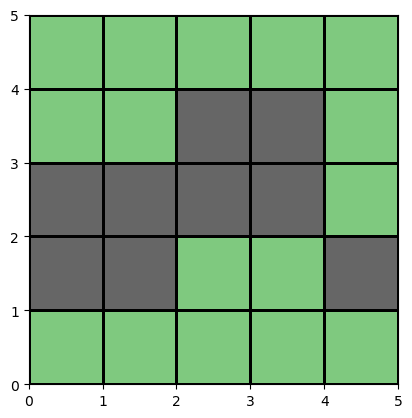

In [57]:
import matplotlib.pyplot as plt

plt.pcolormesh(data, edgecolors='k', linewidth=2, cmap='Accent')
ax = plt.gca()
ax.set_aspect('equal')

In [3]:

sim = fds.Simulation(
    r"./testing_data/test_data/out_crop_circles_cat.smv")

def get_slice_data(sim, qty):
    # get slice data arrays for each individual mesh
    data = []
    coords = []
    times = []

    for slice in sim.slices:
        if str(slice.quantity.name) == qty:
            # Creates a global numpy ndarray from all subslices (of the slice)
            # xyz is the returned matching coordinate for each value on the generated grid (data).
            # can return large sparse arrays for some slices
            slice_data, slice_coords = slice.to_global(
                return_coordinates=True, masked=True)
            # times for each slice
            slice_times = slice.times

            data.append(slice_data)
            coords.append(slice_coords)
            times.append(slice_times)
            break

    return data

hrr_array = get_slice_data(sim, "HRRPUV")
mass_flux_array = get_slice_data(sim, "MASS FLUX")




In [4]:
np.array(hrr_array).shape


(1, 337, 120, 300)

In [8]:
hrr_array = []

for slice in sim.slices:
    if slice.quantity.name == 'HRRPUV':
        hrr_array.append(slice.to_global(
                return_coordinates=True, masked=True))
        
print(f'hrr_array len: {len(hrr_array)}\n\n')

hrr_x = hrr_array[0][1]  # == hrr_array[0][1, :, :] # THIS IS TRUE


hrr_array

# print(f'HRR X:\n{hrr_x}\n\n')
# hrr_y = hrr_array[0][2]  # == hrr_array[0][2, :, :] # THIS IS TRUE
# print(f'HRR Y:\n{hrr_y}\n\n')

hrr_array len: 2




[(array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
  
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
           0.00000000e+00, 0.00000000e+00, 0.0000